<a href="https://colab.research.google.com/github/mbuguajnr23/Trial/blob/main/Mutual_information_coefficient_73572_Mbugua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [20]:
# Define tickers for indices
tickers = {
    "S&P500": "^GSPC",
    "DJIA": "^DJI",
    "Russell2000": "^RUT",
    "NASDAQ": "^IXIC"
}

In [21]:
# Download data
data = {}
for name, ticker in tickers.items():
    data[name] = yf.download(ticker, start="2010-01-01", end="2023-12-31")["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
# Combine all data into a single DataFrame
df = pd.concat(data.values(), axis=1)
df.columns = data.keys()

In [23]:
# Drop rows with NaN values
df.dropna(inplace=True)

In [24]:
# Ensure all indices have the same number of rows
print("Data after cleaning:")
print(df.info())

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S&P500       3522 non-null   float64
 1   DJIA         3522 non-null   float64
 2   Russell2000  3522 non-null   float64
 3   NASDAQ       3522 non-null   float64
dtypes: float64(4)
memory usage: 137.6 KB
None


In [25]:
# Function to calculate mutual information
def mutual_info(x, y):
    x = x.values.reshape(-1, 1)
    y = y.values
    return mutual_info_regression(x, y, random_state=42)[0]

In [26]:
# Initialize result storage
pearson_results = {}
spearman_results = {}
mutual_info_results = {}

In [27]:
# Calculate pairwise metrics
indices_list = list(df.columns)
for i in range(len(indices_list)):
    for j in range(i + 1, len(indices_list)):
        index1 = indices_list[i]
        index2 = indices_list[j]

        # Pearson correlation
        pearson_corr, _ = pearsonr(df[index1], df[index2])
        pearson_results[(index1, index2)] = pearson_corr

        # Spearman correlation
        spearman_corr, _ = spearmanr(df[index1], df[index2])
        spearman_results[(index1, index2)] = spearman_corr

        # Mutual Information
        mutual_info_val = mutual_info(df[index1], df[index2])
        mutual_info_results[(index1, index2)] = mutual_info_val

A. Pearson correlations between each pair

In [28]:
# Display results
print("\nPearson Correlations:")
for pair, value in pearson_results.items():
    print(f"{pair}: {value:.4f}")


Pearson Correlations:
('S&P500', 'DJIA'): 0.9929
('S&P500', 'Russell2000'): 0.9612
('S&P500', 'NASDAQ'): 0.9907
('DJIA', 'Russell2000'): 0.9681
('DJIA', 'NASDAQ'): 0.9777
('Russell2000', 'NASDAQ'): 0.9523


B. Spearman correlation coefficients between each pair.

In [29]:
print("\nSpearman Correlations:")
for pair, value in spearman_results.items():
    print(f"{pair}: {value:.4f}")


Spearman Correlations:
('S&P500', 'DJIA'): 0.9979
('S&P500', 'Russell2000'): 0.9780
('S&P500', 'NASDAQ'): 0.9967
('DJIA', 'Russell2000'): 0.9816
('DJIA', 'NASDAQ'): 0.9931
('Russell2000', 'NASDAQ'): 0.9769


C. Mutual information coefficient between each pair among the indices

In [30]:
print("\nMutual Information Coefficients:")
for pair, value in mutual_info_results.items():
    print(f"{pair}: {value:.4f}")


Mutual Information Coefficients:
('S&P500', 'DJIA'): 3.4635
('S&P500', 'Russell2000'): 2.5266
('S&P500', 'NASDAQ'): 3.4614
('DJIA', 'Russell2000'): 2.3765
('DJIA', 'NASDAQ'): 2.9890
('Russell2000', 'NASDAQ'): 2.5263


# Visualization

In [31]:
# Convert correlation dictionaries to DataFrames
pearson_df = pd.DataFrame.from_dict(pearson_results, orient='index', columns=['Pearson'])
spearman_df = pd.DataFrame.from_dict(spearman_results, orient='index', columns=['Spearman'])
mutual_info_df = pd.DataFrame.from_dict(mutual_info_results, orient='index', columns=['Mutual_Info'])

In [32]:
# Reformat DataFrames for Heatmap
def convert_to_matrix(df, indices):
    matrix = pd.DataFrame(index=indices, columns=indices)
    for (index1, index2), value in df.iterrows():
        matrix.at[index1, index2] = value[0]
        matrix.at[index2, index1] = value[0]
    return matrix.astype(float)

In [33]:
# Generate matrices for heatmaps
pearson_matrix = convert_to_matrix(pearson_df, indices_list)
spearman_matrix = convert_to_matrix(spearman_df, indices_list)

## Plot Heatmaps for Pearson and Spearman Correlations

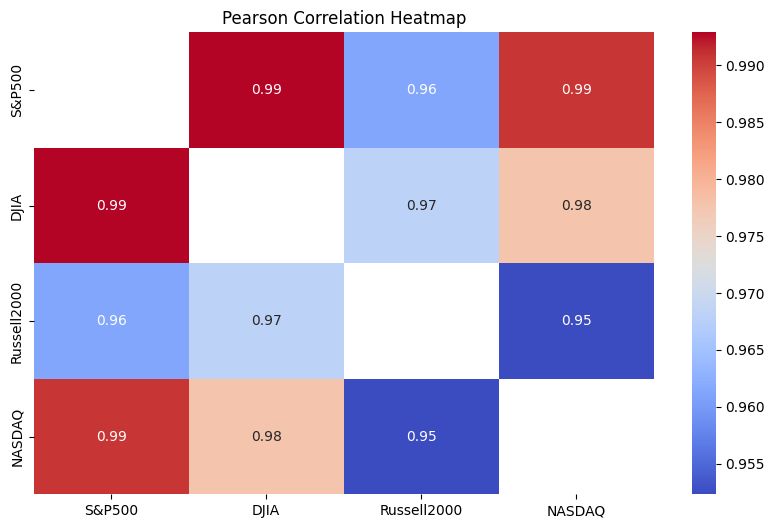

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pearson Correlation Heatmap")
plt.show()

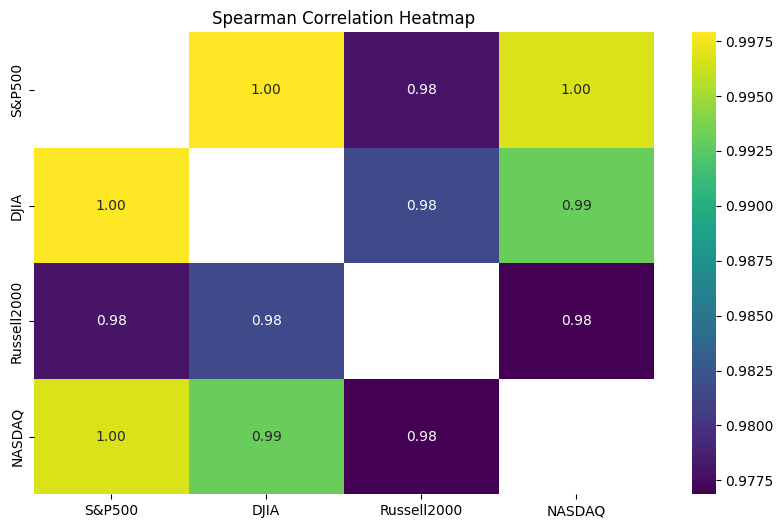

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Spearman Correlation Heatmap")
plt.show()

## Bar Plot for Mutual Information